# Project: Movies Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, I'll provide a brief introduction to the dataset I've selected for analysis. At the end of this section, I wil describe the questions that I plan on exploring over the course of the report.
>
>Introduction to dataset:
I will be using TMDB movie dataset, This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [25]:
# Import all the packages needed for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Let's load the data and check some rows from the dataset to identify the questions that can be answered:

### General Properties

In [26]:
# Reading a csv file and storing the dataset in pandas dataframe variable df
df = pd.read_csv('tmdb-movies.csv')
# Printing the first three rows of the dataset
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


>##### Questions that can be answered by looking at the datasets are:
>###### Some general questions that can be answered are:
>Which movie had the highest and lowest profit?
>
>What is the average runtime of all movies?
>
>What is the relationship between popularity and profit?
>
>Which are the successfull genres?

>In this section of the report, I will check for cleanliness, and then trim and clean my dataset for analysis.
>
>Observations from above dataset are:
<ol>
<li>The dataset has not provided the currency for columns we will be dealing with hence we will assume it is in dollars.<li/>
Even the vote count is not same for all the movies and hence this affects the vote average column.
<ol/>   

In [27]:
# Let us check infomation on datatypes of columns and missing values.
df_i = df.info()
df_i

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [28]:
# lets us check the total number of rows & columns
rows, col = df.shape
print('Now we have {} total rows and {} columns.'.format(rows,col))

Now we have 10866 total rows and 21 columns.


In [29]:
# lets us check some statistics of the data
df_d = df.describe()
df_d

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Cleaning that needs to be prformed by looking at above data:
<ol>
<li>First, remove columns such as 'id', 'imdb_id', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies'.
<li>Second, Lets delete the one duplicated row that we have in our dataset.
<li>Third, There are lots of movies where the budget or revenue have a value of '0' which means that the values of those movies has not been recorded. So we need to discard this rows, since we cannot calculate profit of such movies
<li>Fourth, The 'release_date' column must be converted into date format.
<li>Fifth, Convert budget and revenue column to int datatype.
<li>Sixth, Replace runtime value of 0 to NAN, Since it will affect the result.


>remove columns such as 'id', 'imdb_id', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies'.

In [30]:
# Lets drop columns that are irrelevant
columns = ['cast', 'homepage', 'tagline', 'overview', 'keywords', 'id', 'imdb_id', 'director', 'production_companies']
df.drop( columns, axis=1, inplace=True)
rows, col = df.shape
print('Now we have {} total rows and {} columns.'.format(rows, col))

Now we have 10866 total rows and 12 columns.


In [31]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> Lets delete the one duplicated row that we have in our dataset.

In [32]:
# Calculate number of duplicated rows.
df.duplicated()
sum(df.duplicated())

1

In [33]:
# Drop duplicate rows but keep the first one
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

>The 'release_date' column must be converted into date format.

In [34]:
# change the datatype of the release_date entry to datetime
df.release_date = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

>Convert budget and revenue column to int datatype

In [35]:
columns = ['popularity', 'vote_average', 'budget_adj', 'revenue_adj', 'budget', 'revenue', 'runtime']
df[columns] = df[columns].apply(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10865 non-null  int64         
 1   budget          10865 non-null  int64         
 2   revenue         10865 non-null  int64         
 3   original_title  10865 non-null  object        
 4   runtime         10865 non-null  int64         
 5   genres          10842 non-null  object        
 6   release_date    10865 non-null  datetime64[ns]
 7   vote_count      10865 non-null  int64         
 8   vote_average    10865 non-null  int64         
 9   release_year    10865 non-null  int64         
 10  budget_adj      10865 non-null  int64         
 11  revenue_adj     10865 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 1.1+ MB


In [36]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6,2015,137999939,1392445892
1,28,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7,2015,137999939,348161292
2,13,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6,2015,101199955,271619025
3,11,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7,2015,183999919,1902723129
4,9,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7,2015,174799923,1385748801


>Replace runtime value of 0 to NAN, Since it will affect the result.

In [37]:
df = df.replace(0, np.NaN)
df.dropna(inplace = True)
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1524.000000,1.524000e+03,1.524000e+03,1524.000000,1524.000000,1524.000000,1524.000000,1.524000e+03,1.524000e+03
mean,1.795276,5.799872e+07,2.054079e+08,112.751969,1089.837270,5.990814,2003.542651,6.532508e+07,2.514648e+08
std,1.880216,5.284277e+07,2.361673e+08,20.476501,1154.539823,0.806194,10.889049,5.413271e+07,2.874494e+08
min,1.000000,2.100000e+01,4.200000e+01,63.000000,10.000000,3.000000,1960.000000,3.100000e+01,6.300000e+01
25%,1.000000,2.000000e+07,5.894727e+07,98.000000,376.750000,5.000000,1999.000000,2.593536e+07,7.178051e+07
50%,1.000000,4.000000e+07,1.312332e+08,109.000000,702.000000,6.000000,2007.000000,4.842143e+07,1.600501e+08
75%,2.000000,8.000000e+07,2.594294e+08,124.000000,1333.000000,7.000000,2012.000000,9.202725e+07,3.251145e+08
max,32.000000,3.800000e+08,2.781506e+09,216.000000,9767.000000,8.000000,2015.000000,3.683713e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> We will now compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### Research Question 1 (Which movie had the highest and lowest profit?)

In [38]:
# To calculate profit, we need to substract the budget from the revenue.
df['profit'] = df['revenue'] - df['budget']
# Lets look at the new dataset
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.0,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6,2015,137999939.0,1.392446e+09,1.363529e+09
1,28.0,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7,2015,137999939.0,3.481613e+08,2.284364e+08
2,13.0,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6,2015,101199955.0,2.716190e+08,1.852382e+08
3,11.0,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7,2015,183999919.0,1.902723e+09,1.868178e+09
4,9.0,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,2015-04-01,2947,7,2015,174799923.0,1.385749e+09,1.316249e+09


In [39]:
# To find the movie with highest profit
df.loc[df['profit'].idxmax()]

popularity                                             9.0
budget                                         237000000.0
revenue                                       2781505847.0
original_title                                      Avatar
runtime                                              162.0
genres            Action|Adventure|Fantasy|Science Fiction
release_date                           2009-12-10 00:00:00
vote_count                                            8458
vote_average                                             7
release_year                                          2009
budget_adj                                     240886902.0
revenue_adj                                   2827123750.0
profit                                        2544505847.0
Name: 1386, dtype: object

In [40]:
# To find the movie with lowest profit
df.loc[df['profit'].idxmin()]

popularity                             1.0
budget                         255000000.0
revenue                         89289910.0
original_title             The Lone Ranger
runtime                              149.0
genres            Action|Adventure|Western
release_date           2013-07-03 00:00:00
vote_count                            1607
vote_average                             6
release_year                          2013
budget_adj                     238688504.0
revenue_adj                     83578333.0
profit                        -165710090.0
Name: 5508, dtype: object

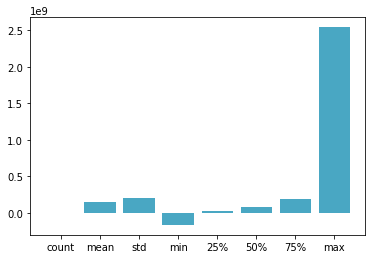

In [41]:
# Ploting a bar chart 
value_count = df['profit'].describe()
plt.bar(value_count.index, value_count.values, color='#49a7c3');

>## Which movie had the highest and lowest profit?
>
>Highest :: Avatar with profit of 2544505847 dollars
>
>Lowest :: The Lone Ranger with profit of -165710090.0 dollars

### Research Question 2  (What is the average runtime of all movies?)

In [42]:
# Find the average runtime of all movies
df['runtime'].mean()

112.75196850393701

## What is the average runtime of all movies?
>So the average runtime of the movies is 109.22 minutes

>Let us plot a histogram for the same.

(array([  2.,   1.,   1.,   1.,   7.,  11.,  29.,  32.,  64.,  92., 107.,
         88., 106.,  91., 106.,  88., 113.,  80.,  73.,  64.,  62.,  51.,
         40.,  35.,  32.,  25.,  23.,  15.,  11.,  12.,   9.,   5.,   8.,
         10.,   6.,   2.,   4.,   5.,   2.,   2.,   1.,   1.,   1.,   3.,
          1.,   1.,   0.,   0.,   0.,   1.]),
 array([ 63.  ,  66.06,  69.12,  72.18,  75.24,  78.3 ,  81.36,  84.42,
         87.48,  90.54,  93.6 ,  96.66,  99.72, 102.78, 105.84, 108.9 ,
        111.96, 115.02, 118.08, 121.14, 124.2 , 127.26, 130.32, 133.38,
        136.44, 139.5 , 142.56, 145.62, 148.68, 151.74, 154.8 , 157.86,
        160.92, 163.98, 167.04, 170.1 , 173.16, 176.22, 179.28, 182.34,
        185.4 , 188.46, 191.52, 194.58, 197.64, 200.7 , 203.76, 206.82,
        209.88, 212.94, 216.  ]),
 <BarContainer object of 50 artists>)

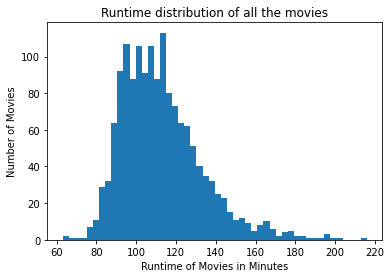

In [43]:
# x-axis
plt.xlabel('Runtime of Movies in Minutes')
# y-axis
plt.ylabel('Number of Movies')
# Title of the histogram
plt.title('Runtime distribution of all the movies')
# Plot a histogram
plt.hist(df['runtime'], bins = 50)

### Research Question 3  (What is the relationship between popularity and profit?)

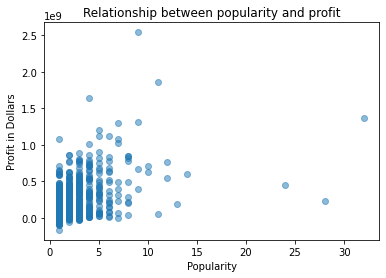

In [44]:
# To show the the relationship between popularity and profit
def plotter():
    plt.xlabel('Popularity')
    plt.ylabel('Profit in Dollars')
    plt.title('Relationship between popularity and profit')
    plt.scatter(df['popularity'], df['profit'], alpha=0.5)
    plt.show()
    return plotter
plotter();

#### relationship between popularity and profit?
> from the scatter plot above popularity and profit have a positive relationship

### Research Question 4  (What is the relationship between budget and profit?)

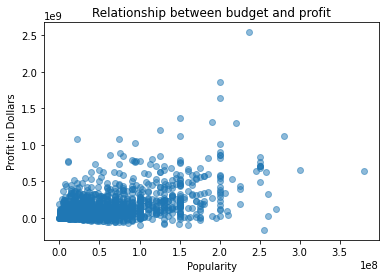

In [46]:
# To show the the relationship between budget and profit
def plotter():
    plt.xlabel('Popularity')
    plt.ylabel('Profit in Dollars')
    plt.title('Relationship between budget and profit')
    plt.scatter(df['budget'], df['profit'], alpha=0.5)
    plt.show()
    return plotter
plotter();

#### relationship between budget and profit?
> from the scatter plot above budget and profit have a positive relationship

### Research Question 5  (Which genres are most successful?)

In [22]:
# This will first concat all the data with | from the whole column and then split it using | and count the number of times it occured.
genres_count = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              553
Action             547
Comedy             496
Thriller           489
Adventure          430
Science Fiction    277
Crime              249
Fantasy            245
Romance            230
Family             222
Mystery            136
Animation          133
Horror             131
War                 53
History             40
Music               38
Western             17
Documentary          2
dtype: int64

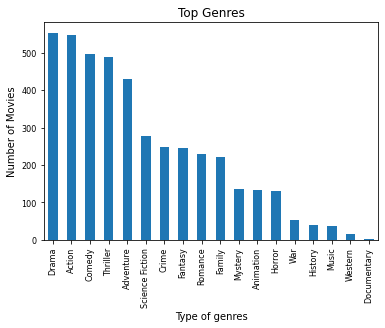

In [23]:
# Initialize the plot
diagram = genres_count.plot.bar(fontsize = 8)
diagram.set(title = 'Top Genres')
diagram.set_xlabel('Type of genres')
diagram.set_ylabel('Number of Movies')
plt.show();

>#### Which genres are most successful
>from the data collected the top few genres are: drama, comedy, thriller, action, romance, and, horror.

<a id='conclusions'></a>
## Conclusions

>###### So the conclusion is, that if we want to create movies which can give us a profit of more then 25M Dollars then
The average budget of the movies can be arround 51870307.75 Dollars
>
>The average runtime of the movies can be arround 112.56 Minutes
>
>The Top 10 Genres we should focus on should be Drama, Comedy, Action, Thriller, Adventure, Romance, Crime, Family, Scince Fiction, Fantasy
>
> The popularity and profit have a positive relationship.

##### The limitations associated with the conclusions are:
>The conclusion is not full proof that given the above requirement the movie will be a big hit but it can be.
>
>Also, we also lost some of the data in the data cleaning steps where we dont know the revenue and budget of the movie, which has affected our analysis.
>
>This conclusion is not error proof.